1. Import

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from env import Environment
from greedyagent import GreedyAgents as GreedyAgent
from acoagent import ACOAgents as ACOAgent
import numpy as np
import pandas as pd

2. Test configs

In [3]:
test_configs = [
    {'map': "map1.txt", 'num_agents': 5, 'n_packages': 100, 'max_time_steps': 1000},
    {'map': "map2.txt", 'num_agents': 5, 'n_packages': 100, 'max_time_steps': 1000},
    {'map': "map3.txt", 'num_agents': 5, 'n_packages': 500, 'max_time_steps': 1000},
    {'map': "map4.txt", 'num_agents': 10, 'n_packages': 500, 'max_time_steps': 1000},
    {'map': "map5.txt", 'num_agents': 10, 'n_packages': 1000, 'max_time_steps': 1000},
]
agent_classes = [GreedyAgent, ACOAgent]

3. Hàm chạy một lần trên một config

In [4]:
def run_episode(env, AgentClass, seed=10, max_steps=1000):
    state = env.reset()
    agent = AgentClass(seed=seed) if 'seed' in AgentClass.__init__.__code__.co_varnames else AgentClass()
    agent.init_agents(state)
    done = False
    t = 0
    while not done and t < max_steps:
        actions = agent.get_actions(state)
        state, reward, done, infos = env.step(actions)
        t += 1
    return infos['total_reward'], infos['total_time_steps']

4. Chạy và tổng hợp kết quả

In [5]:
results = []
for cfg in test_configs:
    for AgentClass in agent_classes:
        env = Environment(
            map_file=cfg['map'],
            n_robots=cfg['num_agents'],
            n_packages=cfg['n_packages'],
            max_time_steps=cfg['max_time_steps'],
            seed=10
        )
        total_reward, total_steps = run_episode(env, AgentClass, seed=10, max_steps=cfg['max_time_steps'])
        results.append({
            'map': cfg['map'],
            'agent': AgentClass.__name__,
            'reward': total_reward,
            'steps': total_steps,
            'num_agents': cfg['num_agents'],
            'n_packages': cfg['n_packages'],
            'max_time_steps': cfg['max_time_steps']
        })

df = pd.DataFrame(results)
display(df)

State robot:  [(2, 8, 0), (5, 2, 0), (1, 6, 0), (8, 4, 0), (4, 6, 0)]
N robots =  5
Actions =  [('L', '0'), ('L', '1'), ('D', '0'), ('L', '0'), ('L', '0')]
[2, 4, 2, 3, 6]
State robot:  [(2, 7, 0), (5, 1, 4), (2, 6, 0), (8, 3, 0), (4, 5, 0)]
N robots =  5
Actions =  [('L', '0'), ('D', '0'), ('L', '0'), ('L', '1'), ('L', '1')]
[2, 4, 2, 3, 6]
State robot:  [(2, 6, 0), (6, 1, 4), (2, 5, 0), (8, 2, 3), (4, 4, 6)]
N robots =  5
Actions =  [('L', '0'), ('R', '2'), ('L', '1'), ('U', '0'), ('D', '0')]
[2, 4, 2, 3, 6]
State robot:  [(2, 5, 0), (6, 2, 0), (2, 4, 2), (7, 2, 3), (5, 4, 6)]
N robots =  5
Actions =  [('L', '1'), ('D', '0'), ('D', '0'), ('U', '0'), ('D', '0')]
[2, 3, 2, 3, 6]
State robot:  [(2, 4, 0), (6, 2, 0), (3, 4, 2), (7, 2, 3), (6, 4, 6)]
N robots =  5
Actions =  [('S', '1'), ('D', '0'), ('D', '0'), ('U', '0'), ('R', '0')]
[2, 3, 2, 3, 6]
State robot:  [(2, 4, 0), (6, 2, 0), (4, 4, 2), (7, 2, 3), (6, 5, 6)]
N robots =  5
Actions =  [('S', '1'), ('D', '0'), ('D', '0'), ('U', '0

map         agent  reward  steps  num_agents  n_packages  \
0  map1.txt  GreedyAgents   29.66   1000           5         100   
1  map1.txt     ACOAgents  714.03   1000           5         100   
2  map2.txt  GreedyAgents   38.70   1000           5         100   
3  map2.txt     ACOAgents   80.57   1000           5         100   
4  map3.txt  GreedyAgents   29.38   1000           5         500   
5  map3.txt     ACOAgents   53.17   1000           5         500   
6  map4.txt  GreedyAgents   29.22   1000          10         500   
7  map4.txt     ACOAgents  379.05   1000          10         500   
8  map5.txt  GreedyAgents    8.66   1000          10        1000   
9  map5.txt     ACOAgents  -64.90   1000          10        1000   

   max_time_steps  
0            1000  
1            1000  
2            1000  
3            1000  
4            1000  
5            1000  
6            1000  
7            1000  
8            1000  
9            1000

5. Biểu đồ so sánh tổng reward trên các map

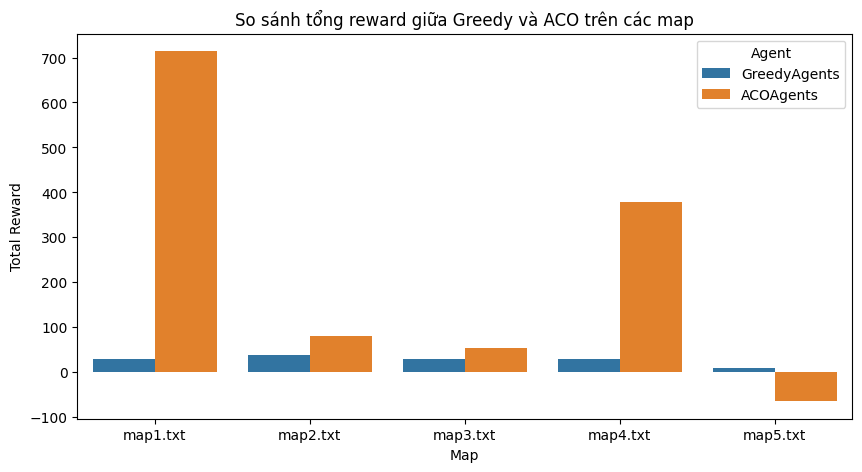

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(data=df, x='map', y='reward', hue='agent')
plt.title("So sánh tổng reward giữa Greedy và ACO trên các map")
plt.ylabel("Total Reward")
plt.xlabel("Map")
plt.legend(title="Agent")
plt.show()



6. In ra log agent

In [7]:
# Chạy 1 agent trên map5 và in log từng bước (có thể chọn map khác)
env = Environment(map_file="map2.txt", n_robots=10, n_packages=1000, max_time_steps=1000, seed=10)
state = env.reset()
agent = ACOAgent()
agent.init_agents(state)
done = False
t = 0
while not done and t < 100:
    actions = agent.get_actions(state)
    state, reward, done, infos = env.step(actions)
    print(f"Step {t}: Reward={reward:.2f} | Robots={state['robots'][:3]}... | Packages={len(state['packages'])}")  # In 3 robot đầu cho ngắn
    t += 1

Step 0: Reward=-0.09 | Robots=[(13, 6, 0), (7, 3, 0), (2, 18, 0)]... | Packages=3
Step 1: Reward=-0.09 | Robots=[(13, 5, 0), (8, 3, 0), (2, 19, 0)]... | Packages=0
Step 2: Reward=-0.10 | Robots=[(14, 5, 0), (8, 2, 0), (2, 18, 0)]... | Packages=2
Step 3: Reward=-0.10 | Robots=[(13, 5, 0), (9, 2, 0), (2, 19, 0)]... | Packages=4
Step 4: Reward=-0.10 | Robots=[(14, 5, 0), (9, 3, 0), (2, 18, 0)]... | Packages=1
Step 5: Reward=-0.10 | Robots=[(14, 4, 0), (9, 2, 0), (2, 17, 0)]... | Packages=1
Step 6: Reward=-0.07 | Robots=[(14, 4, 22), (10, 2, 0), (2, 16, 0)]... | Packages=1
Step 7: Reward=-0.09 | Robots=[(13, 4, 22), (9, 2, 0), (2, 16, 17)]... | Packages=0
Step 8: Reward=-0.10 | Robots=[(12, 4, 22), (9, 3, 0), (3, 16, 17)]... | Packages=1
Step 9: Reward=-0.09 | Robots=[(11, 4, 22), (8, 3, 0), (2, 16, 17)]... | Packages=1
Step 10: Reward=-0.09 | Robots=[(10, 4, 22), (8, 3, 24), (3, 16, 17)]... | Packages=1
Step 11: Reward=-0.10 | Robots=[(9, 4, 22), (8, 4, 24), (3, 17, 17)]... | Packages=1
S

7. Biểu đồ tích lũy

In [8]:
def run_episode_cum_reward(env, AgentClass, seed=10, max_steps=1000):
    state = env.reset()
    agent = AgentClass()
    agent.init_agents(state)
    done = False
    t = 0
    rewards = []
    cum_reward = 0
    while not done and t < max_steps:
        actions = agent.get_actions(state)
        state, reward, done, infos = env.step(actions)
        cum_reward += reward
        rewards.append(cum_reward)
        t += 1
    return rewards

State robot:  [(2, 8, 0), (5, 2, 0), (1, 6, 0), (8, 4, 0), (4, 6, 0)]
N robots =  5
Actions =  [('L', '0'), ('L', '1'), ('D', '0'), ('L', '0'), ('L', '0')]
[2, 4, 2, 3, 6]
State robot:  [(2, 7, 0), (5, 1, 4), (2, 6, 0), (8, 3, 0), (4, 5, 0)]
N robots =  5
Actions =  [('L', '0'), ('D', '0'), ('L', '0'), ('L', '1'), ('L', '1')]
[2, 4, 2, 3, 6]
State robot:  [(2, 6, 0), (6, 1, 4), (2, 5, 0), (8, 2, 3), (4, 4, 6)]
N robots =  5
Actions =  [('L', '0'), ('R', '2'), ('L', '1'), ('U', '0'), ('D', '0')]
[2, 4, 2, 3, 6]
State robot:  [(2, 5, 0), (6, 2, 0), (2, 4, 2), (7, 2, 3), (5, 4, 6)]
N robots =  5
Actions =  [('L', '1'), ('D', '0'), ('D', '0'), ('U', '0'), ('D', '0')]
[2, 3, 2, 3, 6]
State robot:  [(2, 4, 0), (6, 2, 0), (3, 4, 2), (7, 2, 3), (6, 4, 6)]
N robots =  5
Actions =  [('S', '1'), ('D', '0'), ('D', '0'), ('U', '0'), ('R', '0')]
[2, 3, 2, 3, 6]
State robot:  [(2, 4, 0), (6, 2, 0), (4, 4, 2), (7, 2, 3), (6, 5, 6)]
N robots =  5
Actions =  [('S', '1'), ('D', '0'), ('D', '0'), ('U', '0

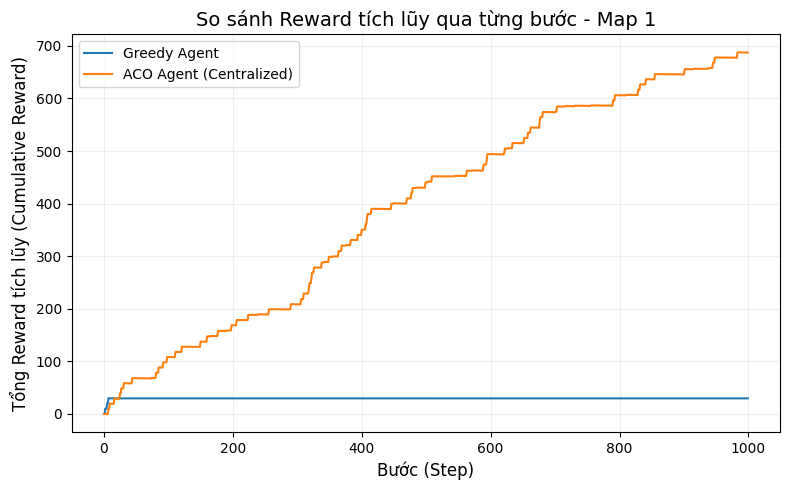

State robot:  [(9, 15, 0), (6, 3, 0), (15, 5, 0), (1, 17, 0), (3, 14, 0)]
N robots =  5
Actions =  [('D', '0'), ('U', '0'), ('U', '0'), ('D', '0'), ('R', '0')]
[3, 1, 6, 5, 5]
State robot:  [(10, 15, 0), (5, 3, 0), (14, 5, 0), (2, 17, 0), (3, 15, 0)]
N robots =  5
Actions =  [('D', '0'), ('L', '1'), ('U', '0'), ('D', '0'), ('R', '1')]
[3, 1, 6, 5, 5]
State robot:  [(11, 15, 0), (5, 2, 1), (13, 5, 0), (3, 17, 0), (3, 16, 5)]
N robots =  5
Actions =  [('D', '0'), ('U', '0'), ('U', '0'), ('L', '1'), ('R', '2')]
[3, 1, 6, 5, 5]
State robot:  [(12, 15, 0), (4, 2, 1), (12, 5, 0), (3, 17, 0), (3, 16, 5)]
N robots =  5
Actions =  [('D', '1'), ('R', '0'), ('U', '0'), ('L', '1'), ('R', '2')]
[3, 1, 6, 5, 5]
State robot:  [(13, 15, 3), (4, 3, 1), (11, 5, 0), (3, 17, 0), (3, 16, 5)]
N robots =  5
Actions =  [('D', '0'), ('R', '0'), ('U', '0'), ('L', '1'), ('R', '2')]
[3, 1, 6, 5, 5]
State robot:  [(14, 15, 3), (4, 4, 1), (10, 5, 0), (3, 17, 0), (3, 16, 5)]
N robots =  5
Actions =  [('L', '0'), ('R

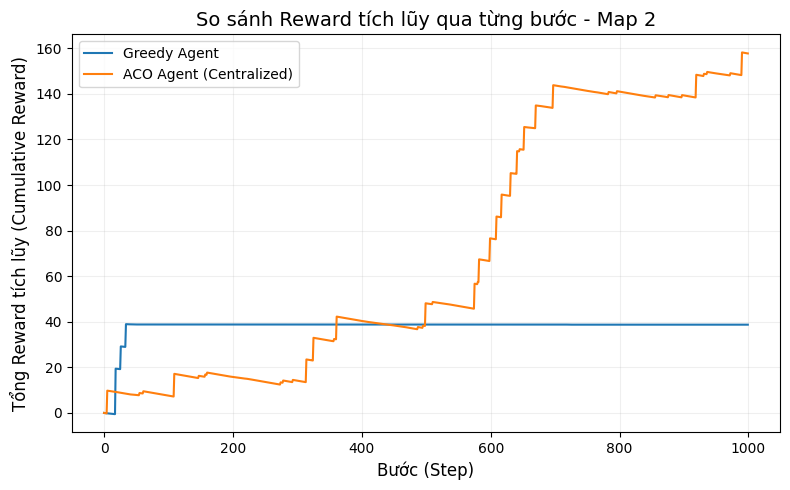

State robot:  [(5, 18, 0), (17, 2, 0), (18, 14, 0), (4, 18, 0), (14, 17, 0)]
N robots =  5
Actions =  [('D', '0'), ('L', '1'), ('U', '0'), ('D', '0'), ('D', '0')]
[2, 5, 3, 2, 3]
State robot:  [(6, 18, 0), (17, 1, 5), (17, 14, 0), (5, 18, 0), (15, 17, 0)]
N robots =  5
Actions =  [('L', '1'), ('D', '0'), ('L', '1'), ('D', '0'), ('D', '0')]
[2, 5, 3, 2, 3]
State robot:  [(6, 17, 2), (18, 1, 5), (17, 13, 3), (6, 18, 0), (16, 17, 0)]
N robots =  5
Actions =  [('D', '0'), ('R', '2'), ('R', '0'), ('L', '1'), ('D', '0')]
[2, 5, 3, 2, 3]
State robot:  [(7, 17, 2), (18, 2, 0), (17, 14, 3), (6, 17, 0), (17, 17, 0)]
N robots =  5
Actions =  [('D', '0'), ('U', '0'), ('R', '0'), ('S', '1'), ('L', '0')]
[2, 5, 3, 2, 3]
State robot:  [(8, 17, 2), (17, 2, 0), (17, 15, 3), (6, 17, 0), (17, 16, 0)]
N robots =  5
Actions =  [('D', '0'), ('L', '1'), ('R', '0'), ('S', '1'), ('L', '0')]
[2, 5, 3, 2, 3]
State robot:  [(9, 17, 2), (17, 1, 0), (17, 15, 3), (6, 17, 0), (17, 16, 0)]
N robots =  5
Actions =  [('

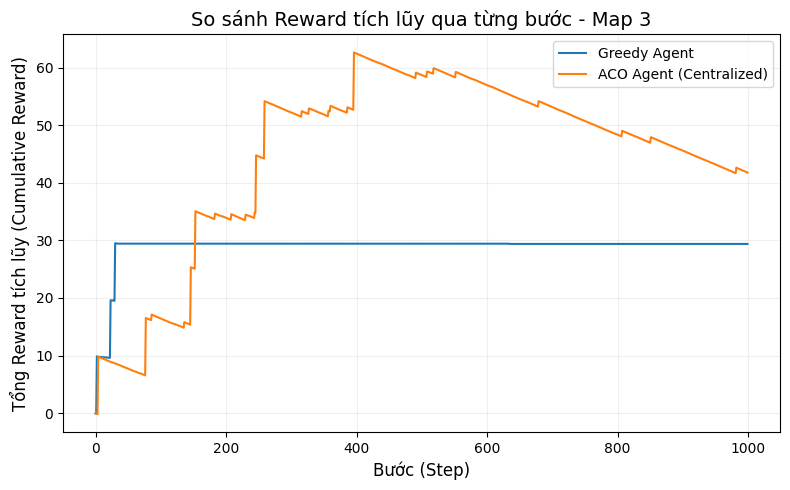

State robot:  [(5, 10, 0), (16, 7, 0), (13, 5, 0), (12, 1, 0), (3, 18, 0), (7, 8, 0), (4, 1, 0), (1, 18, 0), (17, 12, 0), (3, 8, 0)]
N robots =  10
Actions =  [('R', '0'), ('D', '0'), ('R', '0'), ('D', '0'), ('D', '0'), ('R', '0'), ('U', '0'), ('D', '0'), ('L', '0'), ('L', '0')]
[9, 1, 8, 3, 5, 9, 10, 5, 1, 2]
State robot:  [(5, 11, 0), (17, 7, 0), (13, 6, 0), (13, 1, 0), (4, 18, 0), (7, 9, 0), (3, 1, 0), (2, 18, 0), (17, 11, 0), (3, 7, 0)]
N robots =  10
Actions =  [('D', '0'), ('R', '1'), ('R', '0'), ('D', '0'), ('D', '0'), ('R', '0'), ('U', '0'), ('D', '0'), ('L', '0'), ('U', '0')]
[9, 1, 8, 3, 5, 9, 10, 5, 1, 2]
State robot:  [(6, 11, 0), (17, 8, 1), (13, 7, 0), (14, 1, 0), (5, 18, 0), (7, 10, 0), (2, 1, 0), (3, 18, 0), (17, 10, 0), (2, 7, 0)]
N robots =  10
Actions =  [('D', '1'), ('R', '0'), ('R', '0'), ('D', '0'), ('D', '0'), ('R', '1'), ('U', '1'), ('D', '0'), ('L', '0'), ('U', '0')]
[9, 1, 8, 3, 5, 9, 10, 5, 1, 2]
State robot:  [(7, 11, 9), (17, 9, 1), (13, 8, 0), (15, 1, 0), 

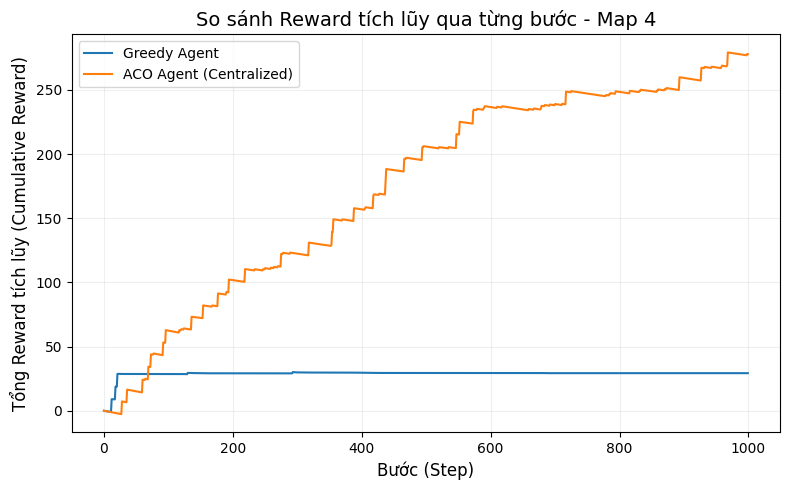

State robot:  [(4, 17, 0), (8, 6, 0), (15, 15, 0), (1, 8, 0), (7, 4, 0), (3, 3, 0), (16, 9, 0), (11, 5, 0), (18, 2, 0), (4, 1, 0)]
N robots =  10
Actions =  [('U', '0'), ('R', '0'), ('L', '0'), ('L', '1'), ('U', '0'), ('L', '0'), ('L', '0'), ('U', '1'), ('R', '0'), ('D', '0')]
[10, 4, 8, 9, 4, 7, 8, 5, 8, 6]
State robot:  [(3, 17, 0), (8, 7, 0), (15, 14, 0), (1, 7, 9), (6, 4, 0), (3, 2, 0), (16, 8, 0), (10, 5, 5), (18, 3, 0), (5, 1, 0)]
N robots =  10
Actions =  [('R', '0'), ('U', '0'), ('L', '0'), ('R', '0'), ('R', '1'), ('L', '0'), ('D', '1'), ('D', '0'), ('R', '0'), ('D', '0')]
[10, 4, 8, 9, 4, 7, 8, 5, 8, 6]
State robot:  [(3, 18, 0), (7, 7, 0), (15, 13, 0), (1, 8, 9), (6, 5, 4), (3, 1, 0), (17, 8, 8), (11, 5, 5), (18, 4, 0), (6, 1, 0)]
N robots =  10
Actions =  [('U', '0'), ('U', '0'), ('L', '0'), ('R', '0'), ('U', '0'), ('U', '0'), ('U', '0'), ('D', '0'), ('R', '0'), ('D', '0')]
[10, 4, 8, 9, 4, 7, 8, 5, 8, 6]
State robot:  [(2, 18, 0), (6, 7, 0), (15, 12, 0), (1, 9, 9), (5, 5, 4

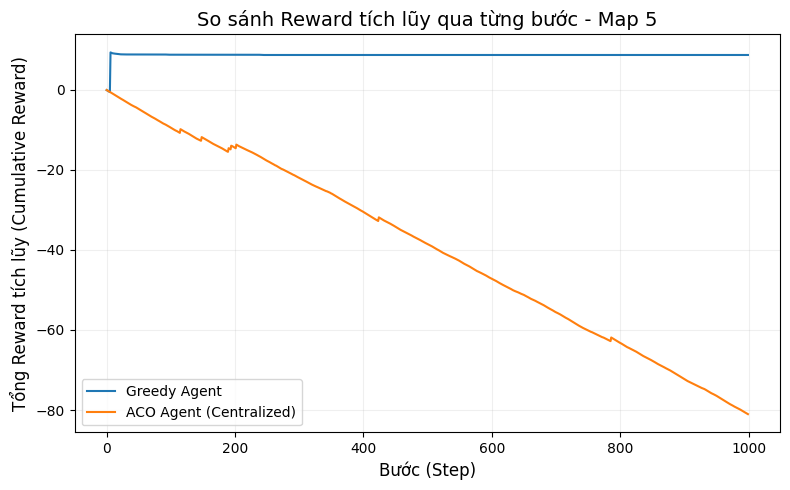

In [9]:
map_configs = [
    {'map': "map1.txt", 'num_agents': 5, 'n_packages': 100, 'max_time_steps': 1000, 'name': 'Map 1'},
    {'map': "map2.txt", 'num_agents': 5, 'n_packages': 100, 'max_time_steps': 1000, 'name': 'Map 2'},
    {'map': "map3.txt", 'num_agents': 5, 'n_packages': 500, 'max_time_steps': 1000, 'name': 'Map 3'},
    {'map': "map4.txt", 'num_agents': 10, 'n_packages': 500, 'max_time_steps': 1000, 'name': 'Map 4'},
    {'map': "map5.txt", 'num_agents': 10, 'n_packages': 1000, 'max_time_steps': 1000, 'name': 'Map 5'},
]

for cfg in map_configs:
    env = Environment(
        map_file=cfg['map'],
        n_robots=cfg['num_agents'],
        n_packages=cfg['n_packages'],
        max_time_steps=cfg['max_time_steps'],
        seed=10
    )
    curve_greedy = run_episode_cum_reward(env, GreedyAgent, seed=10, max_steps=cfg['max_time_steps'])
    env = Environment(
        map_file=cfg['map'],
        n_robots=cfg['num_agents'],
        n_packages=cfg['n_packages'],
        max_time_steps=cfg['max_time_steps'],
        seed=10
    )
    curve_aco = run_episode_cum_reward(env, ACOAgent, seed=10, max_steps=cfg['max_time_steps'])

    plt.figure(figsize=(8,5))
    plt.plot(curve_greedy, label='Greedy Agent')
    plt.plot(curve_aco, label='ACO Agent (Centralized)')
    plt.xlabel("Bước (Step)", fontsize=12)
    plt.ylabel("Tổng Reward tích lũy (Cumulative Reward)", fontsize=12)
    plt.title(f"So sánh Reward tích lũy qua từng bước - {cfg['name']}", fontsize=14)
    plt.legend()
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()


Kết quả và phân tích
Map 1–4:

ACO Agent (Centralized Assignment) cho thấy hiệu quả vượt trội so với Greedy Agent trên bốn bản đồ đầu tiên. Đường reward tích lũy của ACO tăng đều và đạt giá trị cao nhờ khả năng phân công và phối hợp giữa các robot, giúp tối ưu quá trình giao nhận hàng trong môi trường nhiều package và vật cản.

Ngược lại, Greedy Agent chỉ đạt được một số reward nhỏ ban đầu, sau đó reward không tăng thêm đáng kể do các robot nhanh chóng rơi vào trạng thái tắc nghẽn, block lẫn nhau hoặc di chuyển không tối ưu.

Các biểu đồ của ACO Agent thường xuất hiện nhiều “bậc thang” lớn, thể hiện quá trình giao hàng liên tục và hiệu quả.

Map 5:

Trên bản đồ phức tạp nhất, ACO Agent vẫn có khả năng giao được nhiều package ở giai đoạn đầu (reward tích lũy tăng), tuy nhiên về cuối episode reward giảm mạnh, thậm chí có thể trở về giá trị âm. Nguyên nhân là do số lượng bottleneck, ngõ cụt nhiều khiến agent dễ bị deadlock, di chuyển lặp lại không hiệu quả và bị trừ reward do move cost.

Greedy Agent trên map này chỉ đạt được reward thấp, không đổi, thể hiện sự bế tắc rõ rệt của chiến lược này khi gặp các môi trường có cấu trúc phức tạp.

Nhận xét tổng quan
ACO Agent là giải pháp tối ưu hơn hẳn trên phần lớn bản đồ, đặc biệt khi số lượng package và robot tăng, nhờ khả năng phối hợp và tái phân công thông minh.

Tuy nhiên, trên các bản đồ cực kỳ phức tạp như map 5, thuật toán hiện tại vẫn còn hạn chế và cần được cải tiến để tránh hiện tượng stuck hoặc deadlock.

Kết luận
Kết quả thực nghiệm đã khẳng định rằng chiến lược phân công toàn cục (centralized assignment) dựa trên ý tưởng ACO giúp tăng hiệu quả vận chuyển vượt trội so với greedy cục bộ trong hầu hết các trường hợp. Dẫu vậy, các môi trường nhiều điểm nghẽn, ngõ cụt vẫn là thách thức lớn, đặt ra yêu cầu nghiên cứu bổ sung các kỹ thuật phối hợp hoặc thuật toán MAPF nâng cao trong tương lai.

8. Thử nghiệm với configs khác

In [10]:
test_configs2 = [
    {'map': "map1.txt", 'num_agents': 3, 'n_packages': 50, 'max_time_steps': 1000},
    {'map': "map2.txt", 'num_agents': 8, 'n_packages': 120, 'max_time_steps': 1000},
    {'map': "map3.txt", 'num_agents': 6, 'n_packages': 300, 'max_time_steps': 1000},
    {'map': "map4.txt", 'num_agents': 12, 'n_packages': 700, 'max_time_steps': 1000},
    {'map': "map5.txt", 'num_agents': 15, 'n_packages': 1200, 'max_time_steps': 1000},
]
agent_classes = [GreedyAgent, ACOAgent]

In [11]:
results = []
for cfg in test_configs2:
    for AgentClass in agent_classes:
        env = Environment(
            map_file=cfg['map'],
            n_robots=cfg['num_agents'],
            n_packages=cfg['n_packages'],
            max_time_steps=cfg['max_time_steps'],
            seed=10  # Giữ nguyên seed để so sánh công bằng, thay đổi nếu muốn random
        )
        total_reward, total_steps = run_episode(env, AgentClass, seed=10, max_steps=cfg['max_time_steps'])
        results.append({
            'map': cfg['map'],
            'agent': AgentClass.__name__,
            'reward': total_reward,
            'steps': total_steps,
            'num_agents': cfg['num_agents'],
            'n_packages': cfg['n_packages'],
        })
import pandas as pd
df = pd.DataFrame(results)
display(df)


State robot:  [(4, 5, 0), (6, 7, 0), (4, 8, 0)]
N robots =  3
Actions =  [('U', '0'), ('U', '0'), ('U', '1')]
[2, 4, 4]
State robot:  [(3, 5, 0), (5, 7, 0), (3, 8, 4)]
N robots =  3
Actions =  [('L', '0'), ('U', '0'), ('D', '0')]
[2, 4, 4]
State robot:  [(3, 4, 0), (4, 7, 0), (4, 8, 4)]
N robots =  3
Actions =  [('L', '0'), ('U', '0'), ('L', '2')]
[2, 4, 4]
State robot:  [(3, 3, 0), (3, 7, 0), (4, 7, 0)]
N robots =  3
Actions =  [('L', '1'), ('R', '1'), ('U', '0')]
[2, 4, 4]
State robot:  [(3, 2, 2), (3, 8, 0), (3, 7, 0)]
N robots =  3
Actions =  [('R', '0'), ('S', '1'), ('R', '1')]
[2, 4, 4]
State robot:  [(3, 3, 2), (3, 8, 0), (3, 7, 0)]
N robots =  3
Actions =  [('R', '0'), ('S', '1'), ('R', '1')]
[2, 4, 4]
State robot:  [(3, 4, 2), (3, 8, 0), (3, 7, 0)]
N robots =  3
Actions =  [('R', '0'), ('S', '1'), ('R', '1')]
[2, 4, 4]
State robot:  [(3, 5, 2), (3, 8, 0), (3, 7, 0)]
N robots =  3
Actions =  [('R', '2'), ('S', '1'), ('R', '1')]
[2, 4, 4]
State robot:  [(3, 6, 0), (3, 8, 0), (3,

map         agent  reward  steps  num_agents  n_packages
0  map1.txt  GreedyAgents   19.75   1000           3          50
1  map1.txt     ACOAgents  319.57   1000           3          50
2  map2.txt  GreedyAgents   38.77   1000           8         120
3  map2.txt     ACOAgents  178.99   1000           8         120
4  map3.txt  GreedyAgents    9.39   1000           6         300
5  map3.txt     ACOAgents   80.01   1000           6         300
6  map4.txt  GreedyAgents   78.43   1000          12         700
7  map4.txt     ACOAgents  333.38   1000          12         700
8  map5.txt  GreedyAgents   37.61   1000          15        1200
9  map5.txt     ACOAgents  -73.97   1000          15        1200

Biểu đồ reward tích lũy từng bước cho từng map

State robot:  [(4, 5, 0), (6, 7, 0), (4, 8, 0)]
N robots =  3
Actions =  [('U', '0'), ('U', '0'), ('U', '1')]
[2, 4, 4]
State robot:  [(3, 5, 0), (5, 7, 0), (3, 8, 4)]
N robots =  3
Actions =  [('L', '0'), ('U', '0'), ('D', '0')]
[2, 4, 4]
State robot:  [(3, 4, 0), (4, 7, 0), (4, 8, 4)]
N robots =  3
Actions =  [('L', '0'), ('U', '0'), ('L', '2')]
[2, 4, 4]
State robot:  [(3, 3, 0), (3, 7, 0), (4, 7, 0)]
N robots =  3
Actions =  [('L', '1'), ('R', '1'), ('U', '0')]
[2, 4, 4]
State robot:  [(3, 2, 2), (3, 8, 0), (3, 7, 0)]
N robots =  3
Actions =  [('R', '0'), ('S', '1'), ('R', '1')]
[2, 4, 4]
State robot:  [(3, 3, 2), (3, 8, 0), (3, 7, 0)]
N robots =  3
Actions =  [('R', '0'), ('S', '1'), ('R', '1')]
[2, 4, 4]
State robot:  [(3, 4, 2), (3, 8, 0), (3, 7, 0)]
N robots =  3
Actions =  [('R', '0'), ('S', '1'), ('R', '1')]
[2, 4, 4]
State robot:  [(3, 5, 2), (3, 8, 0), (3, 7, 0)]
N robots =  3
Actions =  [('R', '2'), ('S', '1'), ('R', '1')]
[2, 4, 4]
State robot:  [(3, 6, 0), (3, 8, 0), (3,

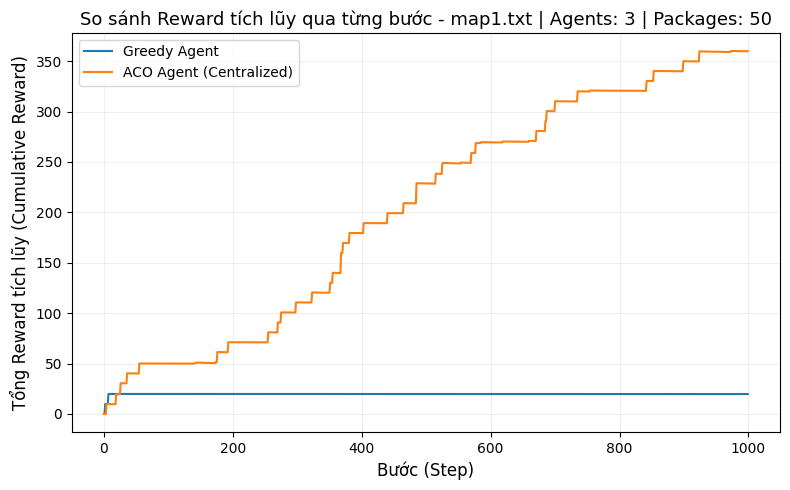

State robot:  [(14, 4, 0), (6, 17, 0), (8, 5, 0), (17, 3, 0), (18, 18, 0), (2, 4, 0), (4, 4, 0), (10, 3, 0)]
N robots =  8
Actions =  [('R', '0'), ('D', '0'), ('U', '0'), ('U', '0'), ('U', '0'), ('S', '1'), ('U', '0'), ('D', '0')]
[8, 5, 2, 8, 6, 4, 2, 8]
State robot:  [(14, 5, 0), (7, 17, 0), (7, 5, 0), (16, 3, 0), (17, 18, 0), (2, 4, 2), (3, 4, 0), (11, 3, 0)]
N robots =  8
Actions =  [('R', '1'), ('L', '1'), ('U', '0'), ('U', '0'), ('U', '0'), ('D', '0'), ('U', '1'), ('D', '0')]
[8, 5, 2, 8, 6, 4, 2, 8]
State robot:  [(14, 6, 8), (7, 16, 5), (6, 5, 0), (15, 3, 0), (16, 18, 0), (2, 4, 2), (3, 4, 0), (12, 3, 0)]
N robots =  8
Actions =  [('R', '0'), ('U', '0'), ('U', '0'), ('U', '0'), ('U', '0'), ('D', '0'), ('U', '1'), ('D', '0')]
[8, 5, 2, 8, 6, 2, 2, 8]
State robot:  [(14, 7, 8), (6, 16, 5), (5, 5, 0), (14, 3, 0), (15, 18, 0), (2, 4, 2), (3, 4, 0), (13, 3, 0)]
N robots =  8
Actions =  [('R', '0'), ('U', '0'), ('U', '0'), ('R', '0'), ('U', '0'), ('D', '0'), ('U', '1'), ('D', '0')]
[

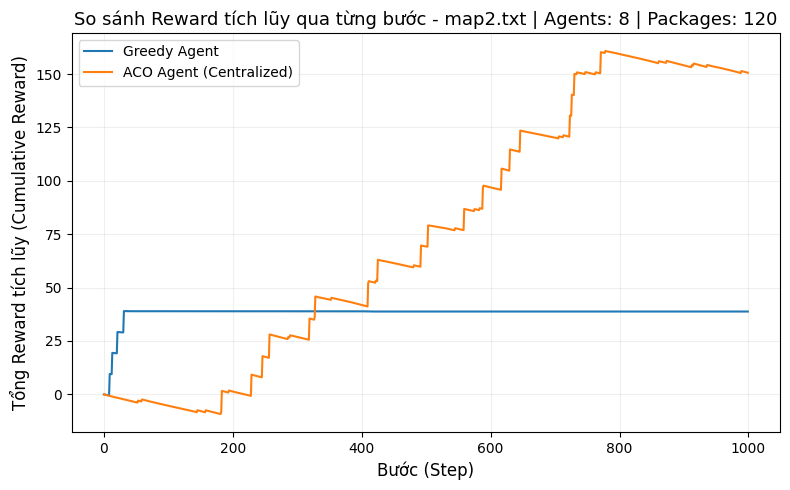

State robot:  [(14, 1, 0), (9, 2, 0), (1, 1, 0), (16, 1, 0), (18, 12, 0), (18, 1, 0)]
N robots =  6
Actions =  [('D', '0'), ('D', '0'), ('D', '0'), ('D', '0'), ('U', '0'), ('R', '1')]
[7, 7, 7, 7, 1, 7]
State robot:  [(15, 1, 0), (10, 2, 0), (2, 1, 0), (17, 1, 0), (17, 12, 0), (18, 2, 7)]
N robots =  6
Actions =  [('D', '0'), ('D', '0'), ('D', '0'), ('D', '0'), ('R', '0'), ('U', '0')]
[7, 7, 7, 7, 1, 7]
State robot:  [(16, 1, 0), (11, 2, 0), (3, 1, 0), (18, 1, 0), (17, 13, 0), (17, 2, 7)]
N robots =  6
Actions =  [('D', '0'), ('D', '0'), ('D', '0'), ('R', '1'), ('R', '0'), ('R', '0')]
[7, 7, 7, 7, 1, 7]
State robot:  [(17, 1, 0), (12, 2, 0), (4, 1, 0), (18, 2, 0), (17, 14, 0), (17, 3, 7)]
N robots =  6
Actions =  [('D', '0'), ('D', '0'), ('D', '0'), ('S', '1'), ('R', '1'), ('R', '0')]
[7, 7, 7, 7, 1, 7]
State robot:  [(18, 1, 0), (13, 2, 0), (5, 1, 0), (18, 2, 0), (17, 15, 1), (17, 4, 7)]
N robots =  6
Actions =  [('R', '1'), ('D', '0'), ('D', '0'), ('S', '1'), ('L', '0'), ('R', '0')]


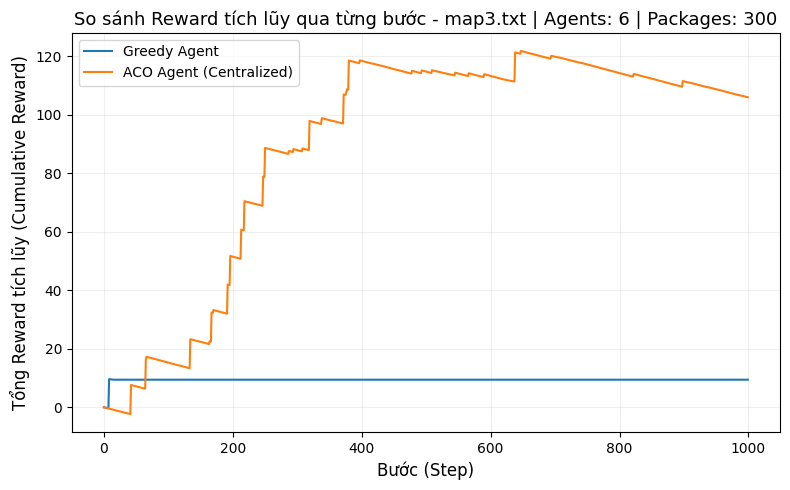

State robot:  [(1, 15, 0), (9, 9, 0), (15, 10, 0), (10, 7, 0), (11, 4, 0), (3, 14, 0), (4, 1, 0), (16, 9, 0), (9, 17, 0), (17, 15, 0), (7, 14, 0), (6, 3, 0)]
N robots =  12
Actions =  [('R', '1'), ('S', '1'), ('L', '0'), ('D', '0'), ('R', '1'), ('R', '0'), ('S', '1'), ('D', '0'), ('U', '0'), ('U', '0'), ('R', '0'), ('D', '1')]
[8, 10, 4, 6, 13, 8, 9, 4, 1, 2, 1, 12]
State robot:  [(1, 16, 8), (9, 9, 10), (15, 9, 0), (11, 7, 0), (11, 5, 6), (3, 15, 0), (4, 1, 9), (17, 9, 0), (8, 17, 0), (16, 15, 0), (7, 15, 0), (7, 3, 12)]
N robots =  12
Actions =  [('L', '0'), ('U', '0'), ('D', '0'), ('L', '0'), ('U', '0'), ('U', '0'), ('U', '0'), ('D', '1'), ('U', '1'), ('U', '0'), ('R', '0'), ('D', '0')]
[8, 10, 4, 6, 13, 8, 9, 4, 1, 2, 1, 12]
State robot:  [(1, 15, 8), (8, 9, 10), (16, 9, 0), (11, 6, 0), (10, 5, 6), (2, 15, 0), (3, 1, 9), (18, 9, 4), (7, 17, 1), (15, 15, 0), (7, 16, 0), (8, 3, 12)]
N robots =  12
Actions =  [('D', '0'), ('U', '0'), ('D', '0'), ('L', '1'), ('U', '0'), ('U', '0'), ('U

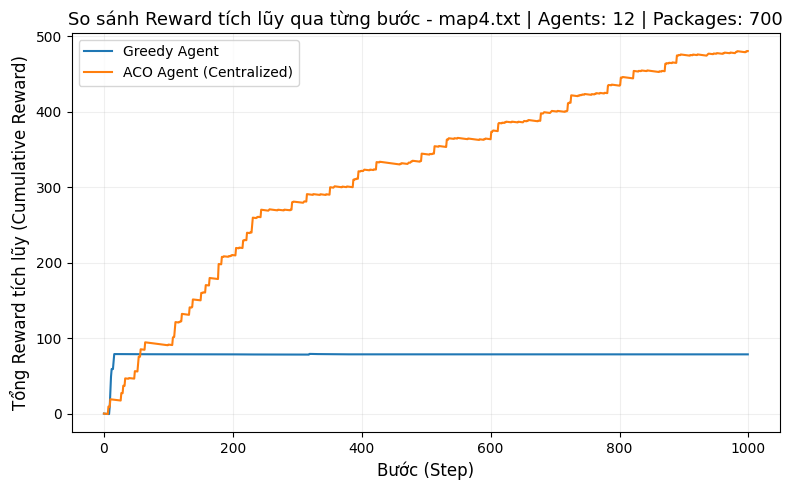

State robot:  [(15, 18, 0), (11, 11, 0), (16, 18, 0), (5, 18, 0), (6, 3, 0), (14, 1, 0), (3, 9, 0), (12, 8, 0), (9, 18, 0), (6, 8, 0), (1, 16, 0), (11, 9, 0), (14, 11, 0), (1, 13, 0), (18, 9, 0)]
N robots =  15
Actions =  [('U', '1'), ('D', '0'), ('U', '0'), ('L', '0'), ('R', '0'), ('U', '1'), ('D', '0'), ('U', '0'), ('L', '0'), ('L', '0'), ('R', '0'), ('L', '0'), ('R', '0'), ('L', '1'), ('L', '0')]
[11, 4, 11, 16, 8, 14, 10, 5, 6, 10, 3, 5, 4, 9, 1]
State robot:  [(14, 18, 11), (12, 11, 0), (15, 18, 0), (5, 17, 0), (6, 4, 0), (13, 1, 14), (4, 9, 0), (11, 8, 0), (9, 17, 0), (6, 7, 0), (1, 17, 0), (11, 9, 0), (14, 12, 0), (1, 12, 9), (18, 8, 0)]
N robots =  15
Actions =  [('D', '0'), ('D', '0'), ('U', '1'), ('U', '0'), ('D', '0'), ('D', '0'), ('L', '0'), ('L', '0'), ('U', '0'), ('U', '1'), ('R', '0'), ('L', '0'), ('D', '0'), ('D', '0'), ('U', '0')]
[11, 4, 11, 16, 8, 14, 10, 5, 6, 10, 3, 5, 4, 9, 1]
State robot:  [(14, 18, 11), (13, 11, 0), (15, 18, 0), (4, 17, 0), (7, 4, 0), (14, 1, 14

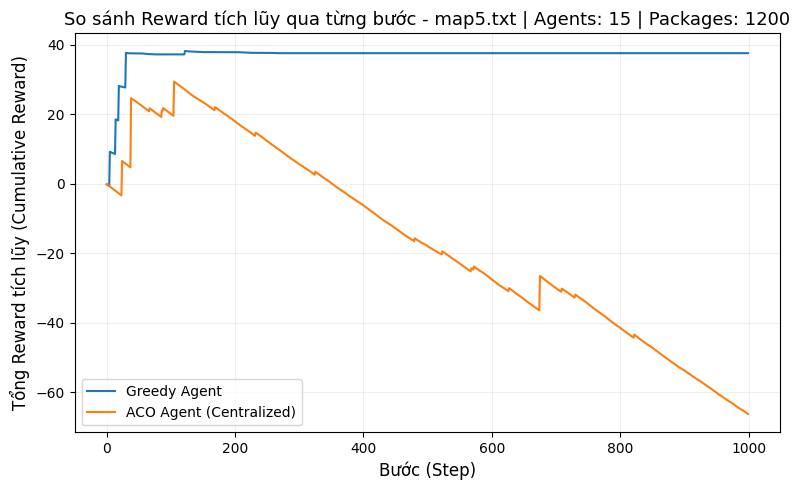

In [12]:
import matplotlib.pyplot as plt

for cfg in test_configs2:
    env = Environment(
        map_file=cfg['map'],
        n_robots=cfg['num_agents'],
        n_packages=cfg['n_packages'],
        max_time_steps=cfg['max_time_steps'],
        seed=10
    )
    curve_greedy = run_episode_cum_reward(env, GreedyAgent, seed=10, max_steps=cfg['max_time_steps'])
    env = Environment(
        map_file=cfg['map'],
        n_robots=cfg['num_agents'],
        n_packages=cfg['n_packages'],
        max_time_steps=cfg['max_time_steps'],
        seed=10
    )
    curve_aco = run_episode_cum_reward(env, ACOAgent, seed=10, max_steps=cfg['max_time_steps'])

    plt.figure(figsize=(8,5))
    plt.plot(curve_greedy, label='Greedy Agent')
    plt.plot(curve_aco, label='ACO Agent (Centralized)')
    plt.xlabel("Bước (Step)", fontsize=12)
    plt.ylabel("Tổng Reward tích lũy (Cumulative Reward)", fontsize=12)
    plt.title(f"So sánh Reward tích lũy qua từng bước - {cfg['map']} | Agents: {cfg['num_agents']} | Packages: {cfg['n_packages']}", fontsize=13)
    plt.legend()
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()


Kết quả vẫn tương tự: ACO vượt trội hoàn toàn Greedy ở map 1 đến 4